<a href="https://colab.research.google.com/github/Gihan007/Machine-Learning-Projects/blob/main/Classification_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING ALL. THE NECCESERY** **LIBRARIES** **bold text**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


**IMPORTING DATASHEET**

In [ ]:
df1 = pd.read_csv('/content/wine.data')
df1.tail()



,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df1.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

**DATA** **PREPROCESSING**

In [ ]:
column_names = [ "type_of_wine" ,"Alcohol" , "Malic acid" , "Ash"  , "Alcalinity of ash", "Magnesium" , "Total phenols" , "Flavanoids" , "Nonflavanoid phenols" , "Proanthocyanins" , "Color intensity" , "Hue" , "OD280/OD315 of diluted wines" , "Proline"]
df1.columns = column_names
print(len(column_names))
df1.head()

14


,type_of_wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
new_row = [float(value) for value in ['1' , '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '0.28', '2.29', '5.64', '1.04', '3.92', '1065']]
df1.loc[0] = new_row
df1.head()

,type_of_wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


**CHECK IF DATA TYPES ARE SAME AND HAVING NULL VALUES**

In [ ]:
data_types = df1.dtypes
print(data_types)

type_of_wine                      int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


In [ ]:
df1.isnull().sum()

,0
type_of_wine,0
Alcohol,0
Malic acid,0
Ash,0
Alcalinity of ash,0
Magnesium,0
Total phenols,0
Flavanoids,0
Nonflavanoid phenols,0
Proanthocyanins,0


**FINDING MIN AND MAX VALUES TO CHECK IF NORMALIZATION NEED**

---



In [ ]:
min_values = df1.min()
max_values = df1.max()
min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})
min_max_df

,Min,Max
type_of_wine,1.00,3.00
Alcohol,11.03,14.83
Malic acid,0.74,5.80
Ash,1.36,3.23
Alcalinity of ash,10.60,30.00
Magnesium,70.00,162.00
Total phenols,0.98,3.88
Flavanoids,0.34,5.08
Nonflavanoid phenols,0.13,0.66
Proanthocyanins,0.41,3.58


**SINCE Magnesium and Proline HAVING LARGER VALUES WHEN COMPARING TO OTHER DATA FEATURES , APPLYING MIN-MAX SCALING TRANSFORMATION**
will get values between 0-1

In [ ]:
columns_to_scale = ['Magnesium', 'Proline']
scaler = MinMaxScaler()
df1[["Magnesium_scaled" , "Proline_scaled"]] = scaler.fit_transform(df1[columns_to_scale])
df1.head(10)


,type_of_wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Magnesium_scaled,Proline_scaled
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.619565,0.561341
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0.336957,0.646933
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.467391,0.857347
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0.521739,0.325963
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0.456522,0.835949
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0.282609,0.721826
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0.554348,0.725392
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0.293478,0.547076
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0.304348,0.547076
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,0.380435,0.878745


Dividing data columns into 2 categories , which is **DEPENDENT , INDEPENDENT** variables

In [ ]:
X = df1.drop(columns=['type_of_wine' , 'Magnesium' , 'Proline'])
y = df1['type_of_wine']

**CHECKING CORRELATIONS BETWEEN EACH INDEPENDENT VARIABLE ALONG WITH DEPENDENT VARIABLE **
1.   IF correlation >=0.9 which means we can remove that feature
2.   IF correlation <=-0.09 weak Correlated between dependet and independet vareable

So , remove "ASH" coloumn , since it has only -0.055



Correlation with target:
 Alcohol                        -0.327957
Malic acid                      0.436478
Ash                            -0.055662
Alcalinity of ash               0.511926
Total phenols                  -0.718917
Flavanoids                     -0.847284
Nonflavanoid phenols            0.486432
Proanthocyanins                -0.505396
Color intensity                 0.264825
Hue                            -0.617447
OD280/OD315 of diluted wines   -0.786623
Magnesium_scaled               -0.209931
Proline_scaled                 -0.631388
dtype: float64

Selected Features based on correlation:
 Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Magnesium_scaled', 'Proline_scaled'],
      dtype='object')


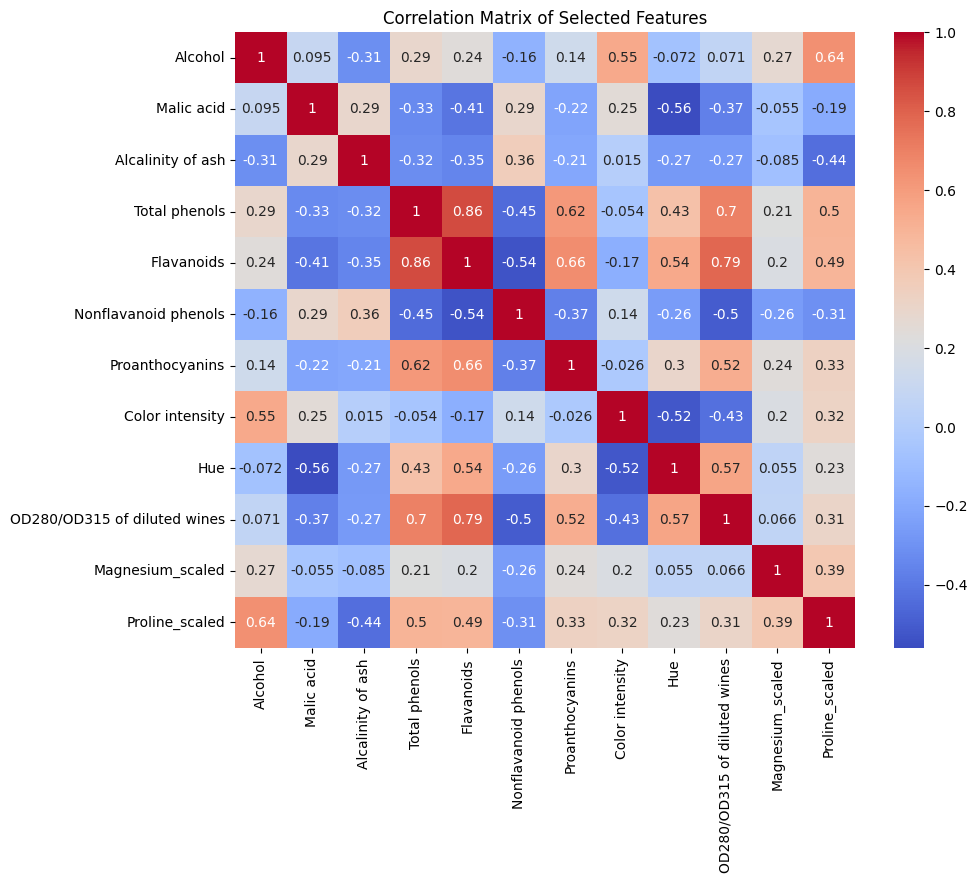


Final Features after Removing Highly Correlated Features:
 Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Magnesium_scaled', 'Proline_scaled'],
      dtype='object')


In [ ]:
correlations = X.corrwith(y)
print("Correlation with target:\n", correlations)

correlation_threshold = 0.2
selected_features = correlations[correlations.abs() >= correlation_threshold].index
print("\nSelected Features based on correlation:\n", selected_features)


X_selected = X[selected_features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)


plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()


corr_matrix = X_scaled_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

X_final = X_scaled_df.drop(columns=to_drop)
print("\nFinal Features after Removing Highly Correlated Features:\n", X_final.columns)


Remove Ash column from X(Independent variable)

In [ ]:
X = X.drop(columns=['Ash'])

In [ ]:
y

,type_of_wine
0,1
1,1
2,1
3,1
4,1
...,...
172,3
173,3
174,3
175,3


**MODEL IMPLEMENTATION**

using K = 3 for default value

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("k-NN Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

k-NN Model Accuracy: 0.9259259259259259

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      0.86      0.90        21
           3       0.88      1.00      0.93        14

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



**Checking Accuracy for range K from 1 to 26**

In [ ]:
accuracies = []
for i in range(1, 26):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print("k-NN Model Accuracy:", accuracy)
  accuracies.append(accuracy)




k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9444444444444444
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9444444444444444
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9074074074074074
k-NN Model Accuracy: 0.9074074074074074
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9259259259259259
k-NN Model Accuracy: 0.9074074074074074
k-NN Model Accuracy: 0.9074074074074074
k-NN Model Accuracy: 0.8888888888888888
k-NN Model Accuracy: 0.8703703703703703
k-NN Model Accuracy: 0.8518518518518519


Visual Representation between K values and Accuracy

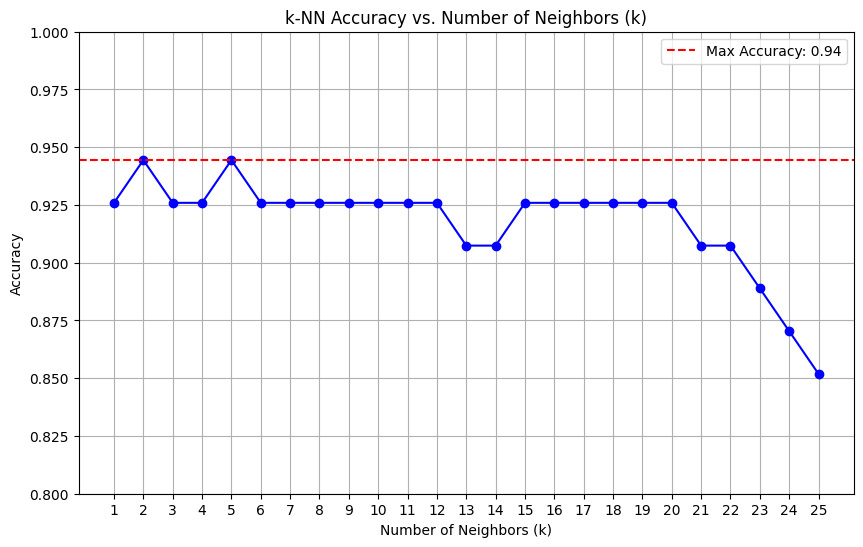

In [ ]:
k_values = np.arange(1, len(accuracies) + 1)

# Plotting the accuracies against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.ylim(0.8, 1)  # Set y-axis limits to better visualize the accuracy range
plt.axhline(y=max(accuracies), color='r', linestyle='--', label=f'Max Accuracy: {max(accuracies):.2f}')
plt.legend()
plt.show()